# Research from HandsOnML
## 1.Overall architecture
Decision Trees are versatile Machine Learning algorithms that can per‐
form both classification and regression tasks, and even multioutput tasks. They are
very powerful algorithms, capable of fitting complex datasets.
Goal: create a model that predict the value of a target variable by learning simple decision rules inferred from the data features. A tree can be seen as a piecewise constant approximation.
## 2. How it work
- Training and Vizualizing
- Making predictions
- Estimating Class Probabilities

In [2]:
import pandas as pd
import numpy as np

In [3]:
df_winequality_red = pd.read_csv("H:\github\WineQuality\Data set\winequality-red.csv", delimiter = ";")
df_winequality_red                                 

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [4]:
from sklearn.preprocessing import StandardScaler

In [5]:
scaler = StandardScaler()

In [6]:
scaler.fit(df_winequality_red.drop('quality', axis = 1))

StandardScaler()

In [7]:
scaler_features = scaler.transform(df_winequality_red.drop('quality', axis = 1))

In [8]:
df_winequality_red_new = pd.DataFrame(scaler_features, columns = df_winequality_red.columns[:-1])
df_winequality_red_new.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246


## X and y arrays (scalers and no scalers)

In [9]:
X = df_winequality_red_new[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides',
                       'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']]
y = df_winequality_red['quality']

In [10]:
X_new= df_winequality_red[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides',
                       'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']]
y_new = df_winequality_red['quality']

## Train test split

In [11]:
from sklearn.model_selection import train_test_split


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [13]:
X_new_train, X_new_test, y_new_train, y_new_test = train_test_split(X, y, test_size = 0.2)

# Wine-quality
## Classification 

In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn import tree

### No scaling

[Text(0.375, 0.875, 'X[3] <= 0.8\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(0.25, 0.625, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(0.5, 0.625, 'X[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(0.25, 0.375, 'X[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(0.125, 0.125, 'gini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(0.375, 0.125, 'gini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(0.75, 0.375, 'X[2] <= 4.85\ngini = 0.043\nsamples = 46\nvalue = [0, 1, 45]'),
 Text(0.625, 0.125, 'gini = 0.444\nsamples = 3\nvalue = [0, 1, 2]'),
 Text(0.875, 0.125, 'gini = 0.0\nsamples = 43\nvalue = [0, 0, 43]')]

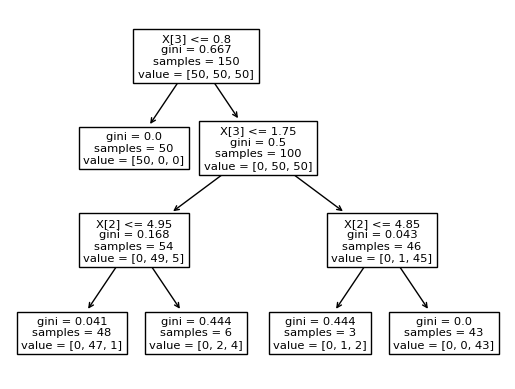

In [15]:
iris = load_iris()  #Using the Iris dataset, construct a tree
X_train, y_train = iris.data, iris.target
clf = tree.DecisionTreeClassifier(max_depth = 3)
clf_wine = clf.fit(X_train, y_train)

tree.plot_tree(clf_wine)

### Scaled

[Text(0.375, 0.875, 'X[2] <= 2.45\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(0.25, 0.625, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(0.5, 0.625, 'X[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(0.25, 0.375, 'X[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(0.125, 0.125, 'gini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(0.375, 0.125, 'gini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(0.75, 0.375, 'X[2] <= 4.85\ngini = 0.043\nsamples = 46\nvalue = [0, 1, 45]'),
 Text(0.625, 0.125, 'gini = 0.444\nsamples = 3\nvalue = [0, 1, 2]'),
 Text(0.875, 0.125, 'gini = 0.0\nsamples = 43\nvalue = [0, 0, 43]')]

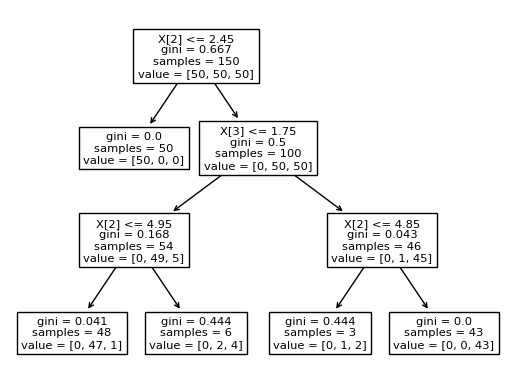

In [16]:
iris = load_iris()  #Using the Iris dataset, construct a tree
clf = tree.DecisionTreeClassifier(max_depth = 3)
X_new_train, y_new_train = iris.data, iris.target
clf_new_wine = clf.fit(X_new_train, y_new_train)

tree.plot_tree(clf_new_wine)

 One of the many qualities of Decision Trees is that they require very little data preparation. In particular, they don’t require feature scaling or centering at all.

### Export the tree in Graphviz
Graphviz is open source graph visualization software. Graph visualization is a way of representing structural information as diagrams of abstract graphs and networks.

In [39]:
from sklearn.tree import export_graphviz

dot_data = tree.export_graphviz(clf_wine, out_file = None,
                               feature_names = iris.feature_names,
                               class_names = iris.target_names,
                               filled = True, rounded = True,
                              )

graph = graphviz.Source(dot_data)
graph

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH